# Bernoulli trial 

What's a Bernoulli trial? A coin-flip! 

How do we simulate a coin flip? With random number generators. 

Using numpy for instance:

In [1]:
import numpy as np

(np.random.rand(10) > .5).astype(np.int)

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

We can also have coin flips that are heads with a given probability $p$. To have a biased coin with probability 70%, we can do this:

In [2]:
(np.random.rand(10) > (1 - .7)).astype(np.int)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

# The Binomial distribution

... is obtained when we do $n$ coin flips with probability $p$ and count the number of heads.

In [3]:
(np.random.rand(20) > (1 - .3)).sum()

6

That's one sample of a Binomial distribution.

If we do this a lot, we can see what the distribution looks like in histogram form.

(array([8.4000e-04, 7.3000e-03, 2.6920e-02, 7.2100e-02, 1.2802e-01,
        1.8034e-01, 1.9138e-01, 1.6548e-01, 1.1478e-01, 6.6280e-02,
        2.9000e-02, 1.1920e-02, 4.2200e-03, 1.1400e-03, 2.4000e-04,
        0.0000e+00, 4.0000e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

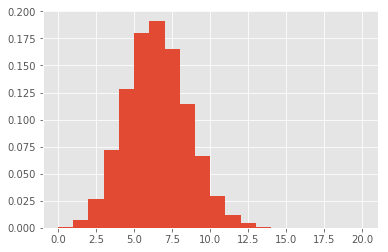

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

samples = [(np.random.rand(20) > (1 - .3)).sum() for _ in range(50000)]
plt.hist(samples, range=(0, 20), bins=20, density=True)

Of course, the mean value we expect is $n p$ :

In [5]:
20 * .3

6.0

# Poisson 

What happens if we now do something like $np$ is fixed but $n$ gets large?

In [6]:
def simulate_binomial(n, p):
    return (np.random.rand(n) > (1 - p)).sum()

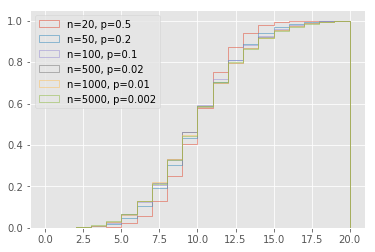

In [30]:
ntimesp = 10.
for n in [20, 50, 100, 500, 1000, 5000]:
    p = ntimesp / n
    samples = [simulate_binomial(n, p) for _ in range(5000)]
    plt.hist(samples, range=(0, 20), bins=20, histtype='step', label=f'n={n}, p={p}', density=True, cumulative=True)
plt.legend(loc='upper left');

Let's compare that with samples from the Poisson distribution.

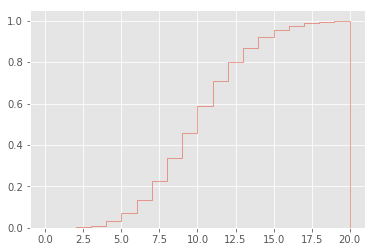

In [31]:
samples = np.random.poisson(lam=ntimesp, size=5000)
plt.hist(samples, range=(0, 20), bins=20, histtype='step', label=f'n={n}, p={p}', density=True, cumulative=True);

# The exponential distribution 

Well, how do we get to the exponential distribution? It needs a mean waiting time...